In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
en_songs2 = pd.read_csv('data/en_songs2.csv')
df = en_songs2.loc[:, en_songs2.columns.intersection(['track_artist','track_name','danceability','energy', 'speechiness', 'acousticness', 'tempo', 'instrumentalness', 'cluster_label'])]
X = df[['danceability', 'energy', 'speechiness', 'acousticness','tempo', 'instrumentalness', 'cluster_label']]

In [4]:
X

,danceability,energy,speechiness,acousticness,tempo,instrumentalness,cluster_label
0,0.303,0.880,0.0442,0.01170,135.225,0.009940,5
1,0.845,0.652,0.2160,0.00432,111.904,0.007230,6
2,0.425,0.378,0.0341,0.68900,118.593,0.000000,12
3,0.760,0.887,0.0409,0.03700,130.018,0.000000,6
4,0.496,0.639,0.0550,0.28000,147.764,0.000000,9
...,...,...,...,...,...,...,...
15400,0.744,0.715,0.3510,0.10100,154.962,0.000000,17
15401,0.479,0.800,0.0878,0.00555,128.012,0.000000,6
15402,0.963,0.603,0.1800,0.06730,129.990,0.000006,2
15403,0.458,0.540,0.0270,0.71500,142.218,0.000428,1


In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [51]:
distortions = []
cluster_range= range(1,15)

for n_cluster in cluster_range:
    kmean_model = KMeans(n_clusters=n_cluster)
    kmean_model.fit(X)
    distortions.append(kmean_model.inertia_)

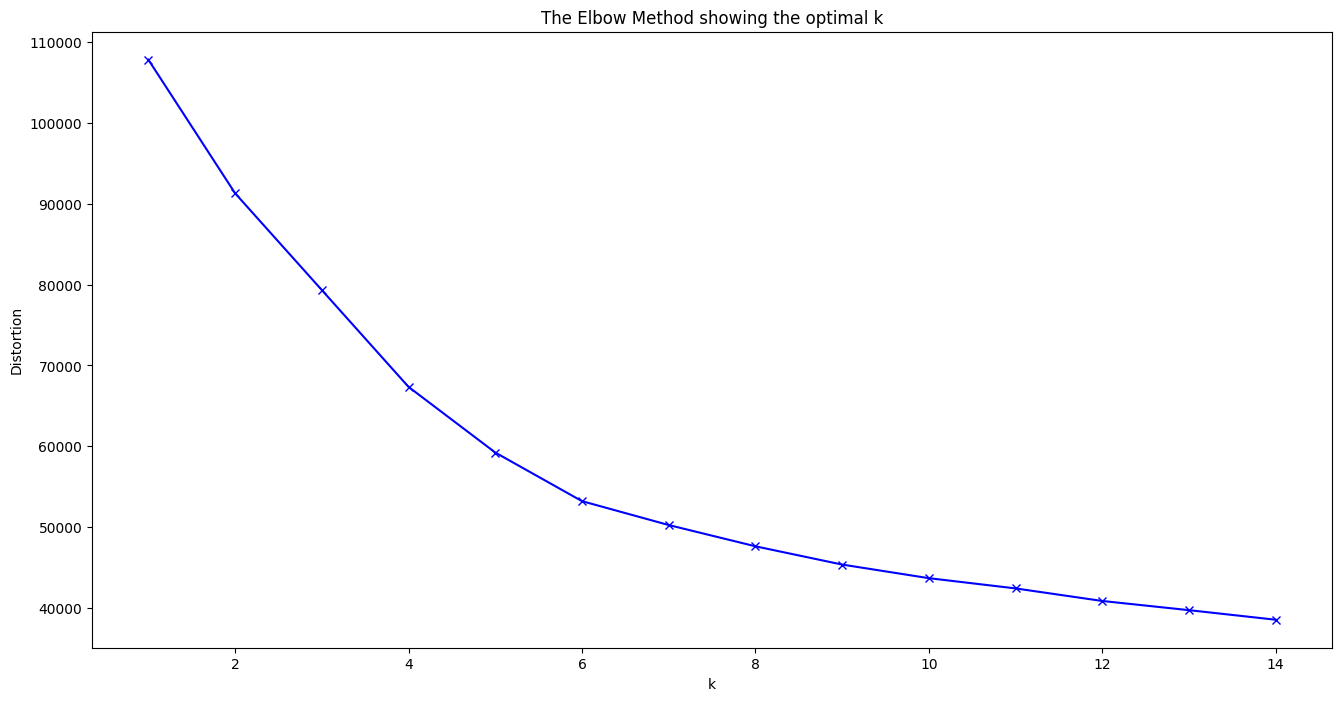

In [52]:
plt.figure(figsize=(16,8))
plt.plot(cluster_range, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [6]:
true_k = 6
km = KMeans(n_clusters=true_k)
km.fit(X)

KMeans(n_clusters=6)

In [7]:
labels = km.labels_
songs_cl2 = pd.DataFrame(list(zip(en_songs2.track_name, labels)), columns=['title','cluster'])
songs_cl2.cluster.value_counts()

1    4480
5    3773
2    2510
3    1992
0    1918
4     732
Name: cluster, dtype: int64

In [8]:
songs_cl2

,title,cluster
0,I Feel Alive,2
1,Poison,0
2,Baby It's Cold Outside (feat. Christina Aguilera),3
3,Dumb Litty,1
4,Soldier,2
...,...,...
15400,Some Way,0
15401,Rising Like The Sun - Radio Mix,2
15402,Anaconda,1
15403,Bound,3


In [9]:
en_songs2['cluster_label'] = songs_cl2['cluster']

In [10]:
en_songs3 = en_songs2.copy()

In [11]:
en_songs3.to_csv('data/en_songs3.csv', index=False)